In [271]:
# let us make a figure
import matplotlib.pyplot as plt
import jax.numpy as np

plt.style.use('../wk17/sty.mplstyle')
import matplotlib.patheffects as pe
text_path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()]
path_effects = [pe.Stroke(linewidth=6, foreground='k'), pe.Normal()]
path_effects_big = [pe.Stroke(linewidth=10, foreground='k'), pe.Normal()]

import dLuxToliman as dlT
import dLux as dl

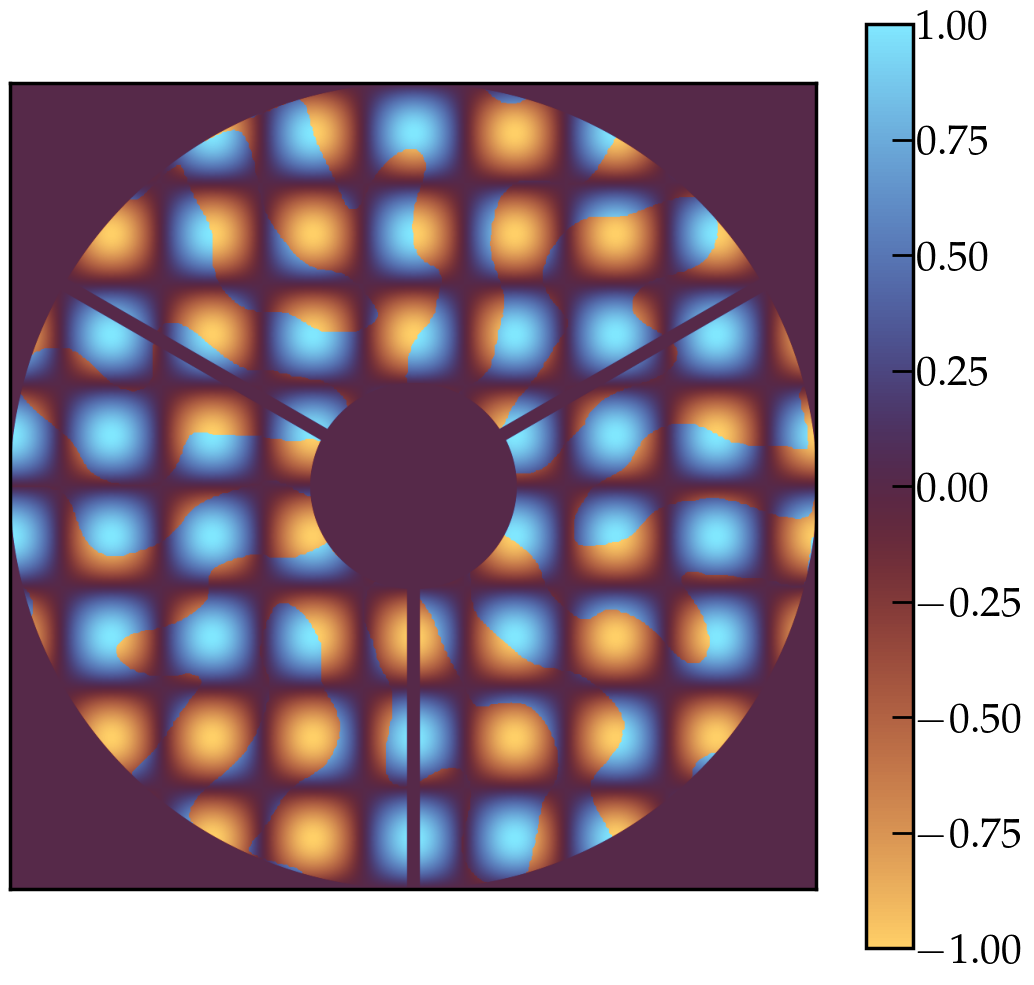

In [208]:
aperture = dlT.TolimanApertureLayer(1024).transmission

phase = dlT.PhaseGratingLayer(1024, 0.125, 0.0125*2.5, 2, True).phase

# plt.imshow(aperture)
# plt.show()
plt.imshow((phase)*aperture, cmap='managua',origin='lower')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

/var/folders/2s/299fsjvd5w13x4x_w7x554fh0000gn/T/ipykernel_29727/1600234691.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


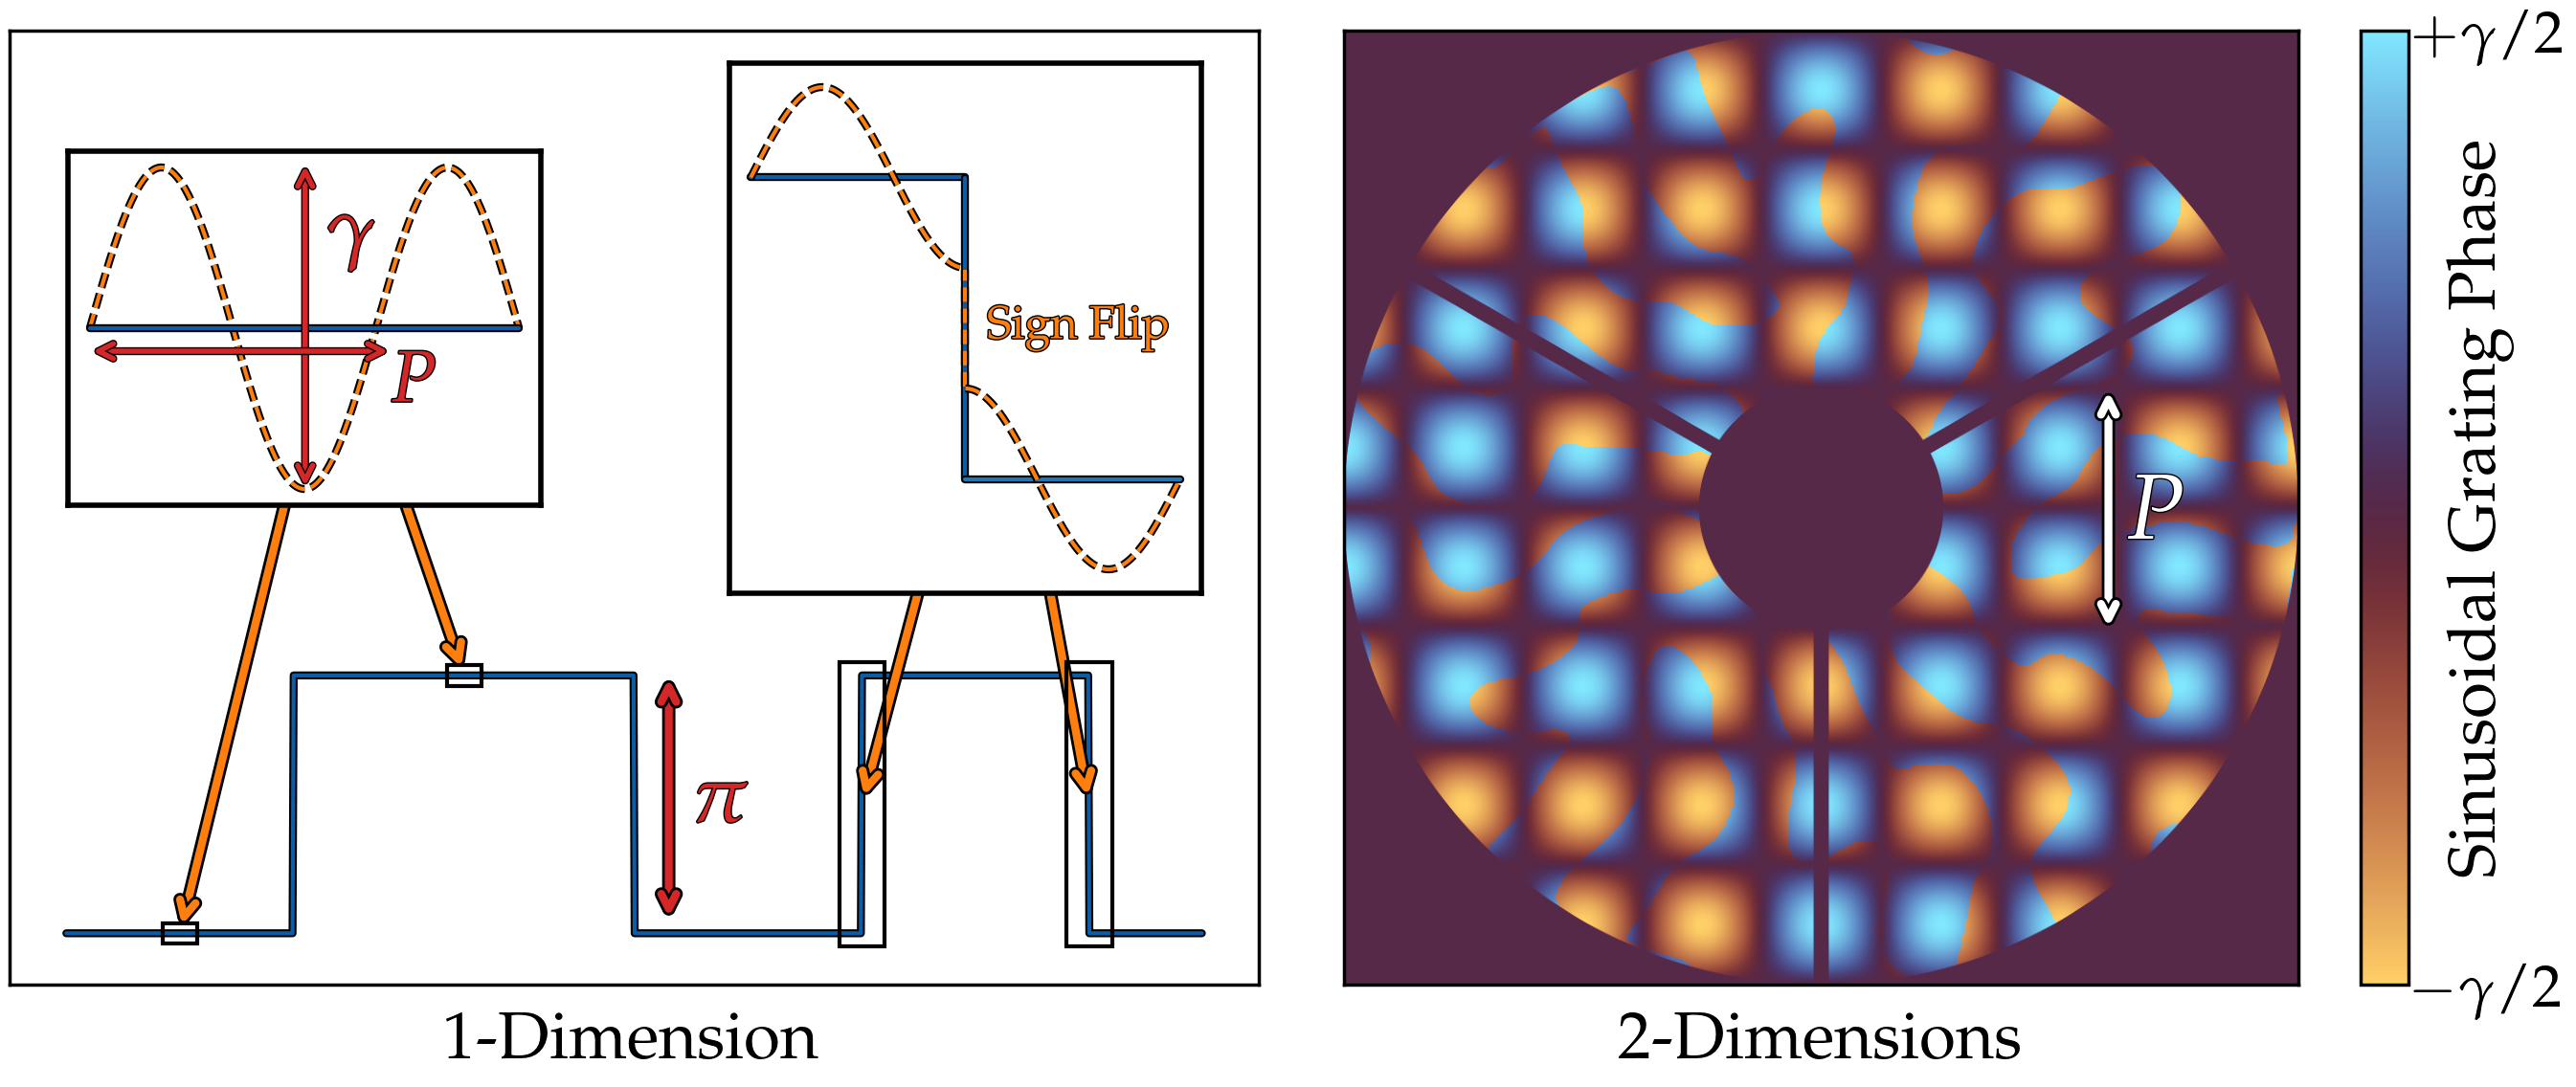

In [ ]:
# data
x_vals = np.linspace(0, 10, 1000)
y_vals = np.hstack([
    np.zeros(200),
    np.ones(300),
    np.zeros(200),
    np.ones(200),
    np.zeros(100)
])

fig = plt.figure(figsize=(28,12))
ax = fig.add_subplot(1,2,1)
ax.plot(x_vals, y_vals, path_effects=path_effects)
ax.set_ylim(-0.2, 3.5)
ax.set_yticks([])
ax.set_xticks([])

# --- Compute "source" points (centres of the first zero- and one-blocks)
idx_zero = 100                  # middle of first zeros (0..199)
idx_one  = 200 + 150            # middle of first ones (200..499)
x_zero = x_vals[idx_zero]
y_zero = y_vals[idx_zero]
x_one  = x_vals[idx_one]
y_one  = y_vals[idx_one]

# --- Create a small inset axes above the main plot and draw a boxed sinusoid
ax_pos = ax.get_position()  # Bbox in figure coordinates
inset_w = 0.5 * ax_pos.width
inset_h = 0.4 * ax_pos.height
inset_x = ax_pos.x0 + -0.25 * ax_pos.width
inset_y = ax_pos.y0 + 0.55 * ax_pos.height

inset_ax = fig.add_axes([inset_x, inset_y, inset_w, inset_h])
t = np.linspace(0, 3*np.pi, 300)
inset_ax.plot(t, 0.7*np.sin(t) + 0.5, color='tab:orange', path_effects = path_effects, ls='--')
inset_ax.plot(t, np.ones(300)*0.5, ls='-', path_effects = path_effects)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
# give the inset a visible box (thicker spine)
for spine in inset_ax.spines.values():
    spine.set_linewidth(4)
inset_ax.set_facecolor("white")

# add the gamma annotation
# draw a double-headed vertical arrow
inset_ax.annotate(
    "",
    xy=(t[150], -0.2),               # tail
    xytext=(t[150], 1.22),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=4, color='tab:red', path_effects=path_effects)
)

inset_ax.text(
    t[165], 0.9,
    r"$\gamma$",
    va='center', ha='left',
    path_effects=text_path_effects, color='tab:red', fontsize=60
)

# period one
inset_ax.annotate(
    "",
    xy=(t[0], 0.4),               # tail
    xytext=(t[210], 0.4),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=4, color='tab:red', path_effects=path_effects)
)

inset_ax.text(
    t[210], 0.25,
    r"$P$",
    va='center', ha='left',
    path_effects=text_path_effects, color='tab:red', fontsize=55
)

# next one
inset_x_2 = ax_pos.x0 + 0.45 * ax_pos.width
inset_y_2 = ax_pos.y0 + 0.45 * ax_pos.height

inset_ax_2 = fig.add_axes([inset_x_2, inset_y_2, inset_w, 1.5*inset_h])
t_1 = np.linspace(0, 1.5*np.pi, 150)

inset_ax_2.plot(t_1, np.ones(150)*0.5, ls='-', path_effects = path_effects)

# the vertical lines
inset_ax_2.axvline(1.5*np.pi, ymin=0.216,ymax=0.784, ls='-', path_effects = path_effects)
inset_ax_2.plot(t_1, 0.3*np.sin(t_1) + 0.5, color='tab:orange', path_effects = path_effects, ls='--')
inset_ax_2.axvline(1.5*np.pi, ymin=0.39,ymax=0.61, ls='--', path_effects = path_effects, color='tab:orange')

t_2 = np.linspace(1.5*np.pi, 3*np.pi, 150)

inset_ax_2.plot(t_2, -np.ones(150)*0.5, ls='-', path_effects = path_effects, color='tab:blue')

inset_ax_2.plot(t_2, -0.3*np.sin(t_2) - 0.5, color='tab:orange', path_effects = path_effects, ls='--')


#adding text
inset_ax_2.text(
    t_2[15], 0,
    r"Sign Flip",
    va='center', ha='left',
    path_effects=text_path_effects, color='tab:orange', fontsize=35
)

inset_ax_2.set_xticks([])
inset_ax_2.set_yticks([])
# give the inset a visible box (thicker spine)
for spine in inset_ax_2.spines.values():
    spine.set_linewidth(4)
inset_ax_2.set_facecolor("white")

# wwhat you talking bout boss
# adding rectanges
from matplotlib.patches import Rectangle

# centre at x_zero,y_zero and rectangle size in data units
width = 0.3
height = 0.08
lower_left = (x_zero - width/2, y_zero - height/2)

rect = Rectangle(lower_left, width, height,
                 edgecolor='black', facecolor='none',
                 linewidth=3, linestyle='-', zorder=4, path_effects=text_path_effects)
ax.add_patch(rect)

coord_one = (x_one - width/2, y_one - height/2)

rect = Rectangle(coord_one, width, height,
                 edgecolor='black', facecolor='none',
                 linewidth=3, linestyle='-', zorder=4, path_effects=text_path_effects)
ax.add_patch(rect)

width_2 = 0.4
height_2 = 1.1
coord_2 = (x_vals[700] - width_2/2, 0.5 - height_2/2)

rect = Rectangle(coord_2, width_2, height_2,
                 edgecolor='black', facecolor='none',
                 linewidth=3, linestyle='-', zorder=4, path_effects=text_path_effects)
ax.add_patch(rect)

coord_3 = (x_vals[900] - width_2/2, 0.5 - height_2/2)

rect = Rectangle(coord_3, width_2, height_2,
                 edgecolor='black', facecolor='none',
                 linewidth=3, linestyle='-', zorder=4, path_effects=text_path_effects)
ax.add_patch(rect)


# --- Arrow targets: take the centre of the inset (figure fraction coords)
inset_bbox = inset_ax.get_position()
fx = inset_bbox.x0 + inset_bbox.width * 0.5   # figure-fraction x
fy = inset_bbox.y0 + inset_bbox.height * 0.5  # figure-fraction y

# Draw arrows from data points to the inset centre
arrowprops = dict(arrowstyle="->", linewidth=6, color="tab:orange",
                  shrinkA=0, shrinkB=6, mutation_scale=30, path_effects = path_effects_big)

# annotate from the first zeros block
ax.annotate(
    "",
    xy=(x_zero, y_zero),           # arrow tail in data coords
    xycoords='data',
    xytext=(fx, fy),               # arrow head in figure-fraction coords
    textcoords='figure fraction',
    arrowprops=arrowprops
)

# annotate from the first ones block (slightly offset the target so arrows don't overlap)
ax.annotate(
    "",
    xy=(x_one, y_one),
    xycoords='data',
    xytext=(fx, fy),  # small offset so arrows are visually separate
    textcoords='figure fraction',
    arrowprops=dict(arrowstyle="->", linewidth=6, color="tab:orange",
                    shrinkA=0, shrinkB=6, mutation_scale=30, path_effects=path_effects_big)
)

# optional label inside or next to inset
# inset_ax.text(0.02, 0.85, "boxed\nsinusoid", transform=inset_ax.transAxes,
#               va='top', ha='left', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none"))


inset_bbox = inset_ax_2.get_position()
fx = inset_bbox.x0 + inset_bbox.width * 0.5   # figure-fraction x
fy = inset_bbox.y0 + inset_bbox.height * 0.5  # figure-fraction y

ax.annotate(
    "",
    xy=(x_vals[700], y_vals[700]-0.5),           # arrow tail in data coords
    xycoords='data',
    xytext=(fx, fy),               # arrow head in figure-fraction coords
    textcoords='figure fraction',
    arrowprops=arrowprops
)

# annotate from the first ones block (slightly offset the target so arrows don't overlap)
ax.annotate(
    "",
    xy=(x_vals[900], y_vals[900]+0.5),
    xycoords='data',
    xytext=(fx, fy),  # small offset so arrows are visually separate
    textcoords='figure fraction',
    arrowprops=dict(arrowstyle="->", linewidth=6, color="tab:orange",
                    shrinkA=0, shrinkB=6, mutation_scale=30, path_effects=path_effects_big)
)

# ax.set_ylabel('Phase')
# ax.set_yticks([0,1])
# ax.set_yticklabels([r'$0$', r'$\pi$'])

# pick x position (data coords) and y-range for the arrow
x_pos = x_vals[530]
y_min, y_max = 0.05, 1          # in your data units (0..1 here)

# draw a double-headed vertical arrow
ax.annotate(
    "",
    xy=(x_pos, y_min),               # tail
    xytext=(x_pos, y_max),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='tab:red', path_effects=path_effects_big)
)

ax.text(
    x_vals[550], 0.5,
    r"$\pi$",
    va='center', ha='left',
    path_effects=text_path_effects, color='tab:red', fontsize=60
)

# now for the second axis
ax2 = fig.add_subplot(1,2,2)
im = ax2.imshow(aperture*phase, origin='lower', cmap='managua')
ax2.set_xticks([])
ax2.set_yticks([])

cbar = fig.colorbar(im, ax=ax2)
cbar.set_ticks([-1, 1])
cbar.set_ticklabels([r'$-\gamma/2$', r'$+\gamma/2$'])
cbar.ax.tick_params(labelsize=45) 

cbar.set_label(r'Sinusoidal Grating Phase', fontsize=50, labelpad=-90)
cbar.ax.yaxis.label.set_clip_on(False)

ax2.set_xlabel('2-Dimensions',labelpad=20,fontsize=50)
ax.set_xlabel('1-Dimension',labelpad=20,fontsize=50)

# adding the last arrow
ax2.annotate(
    "",
    xy=(820, 380),               # tail
    xytext=(820, 640),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='white', path_effects=path_effects_big)
)

ax2.text(
    840, 500,
    r"$P$",
    va='center', ha='left',
    path_effects=text_path_effects, color='white', fontsize=70
)

plt.tight_layout()

#plt.savefig('flippy_grating.pdf',dpi=300,bbox_inches='tight')
plt.show()


In [421]:
# alight, let us now make another figure: the diffraction orders and polychromatic sidelobe
wf_npix = 512
phase_difference = 1.5*np.pi
diameter = 0.125
period = diameter/16
apertureLayer = dlT.TolimanApertureLayer(wf_npix)
pupilLayer = dlT.TolimanPupilLayer(wf_npix)
gratingLayer = dlT.PhaseGratingLayer(wf_npix, diameter, period, phase_difference, True)

layers = [
    (
        'aperture',
        apertureLayer
    ),
    (
        'pupil',
        pupilLayer
    ),
    (
        'grating',
        gratingLayer
    )
]

psf_pixel_scale = 0.375
oversample = 4
psf_npix = 300

optics = dl.AngularOpticalSystem(wf_npix, diameter, layers, psf_npix, psf_pixel_scale, oversample)

wavelength = 585e-9

source = dl.PointSource(wavelengths = np.array([wavelength]), flux=1)

grating2 = dlT.PhaseGratingLayer(wf_npix, diameter, period/2, phase_difference, True)
layers_2 = [
    (
        'aperture',
        apertureLayer
    ),
    (
        'pupil',
        pupilLayer
    ),
    (
        'grating',
        grating2
    )
]
optics_2 = dl.AngularOpticalSystem(wf_npix, diameter, layers_2, psf_npix, psf_pixel_scale, oversample)
model = dl.Telescope(optics, source)

image = model.model()

wavelengths = np.linspace(500e-9, 740e-9, 40)

source_2 = dl.PointSource(wavelengths=wavelengths, flux=1)
model_2 = dl.Telescope(optics_2, source_2)

image_poly = model_2.model()

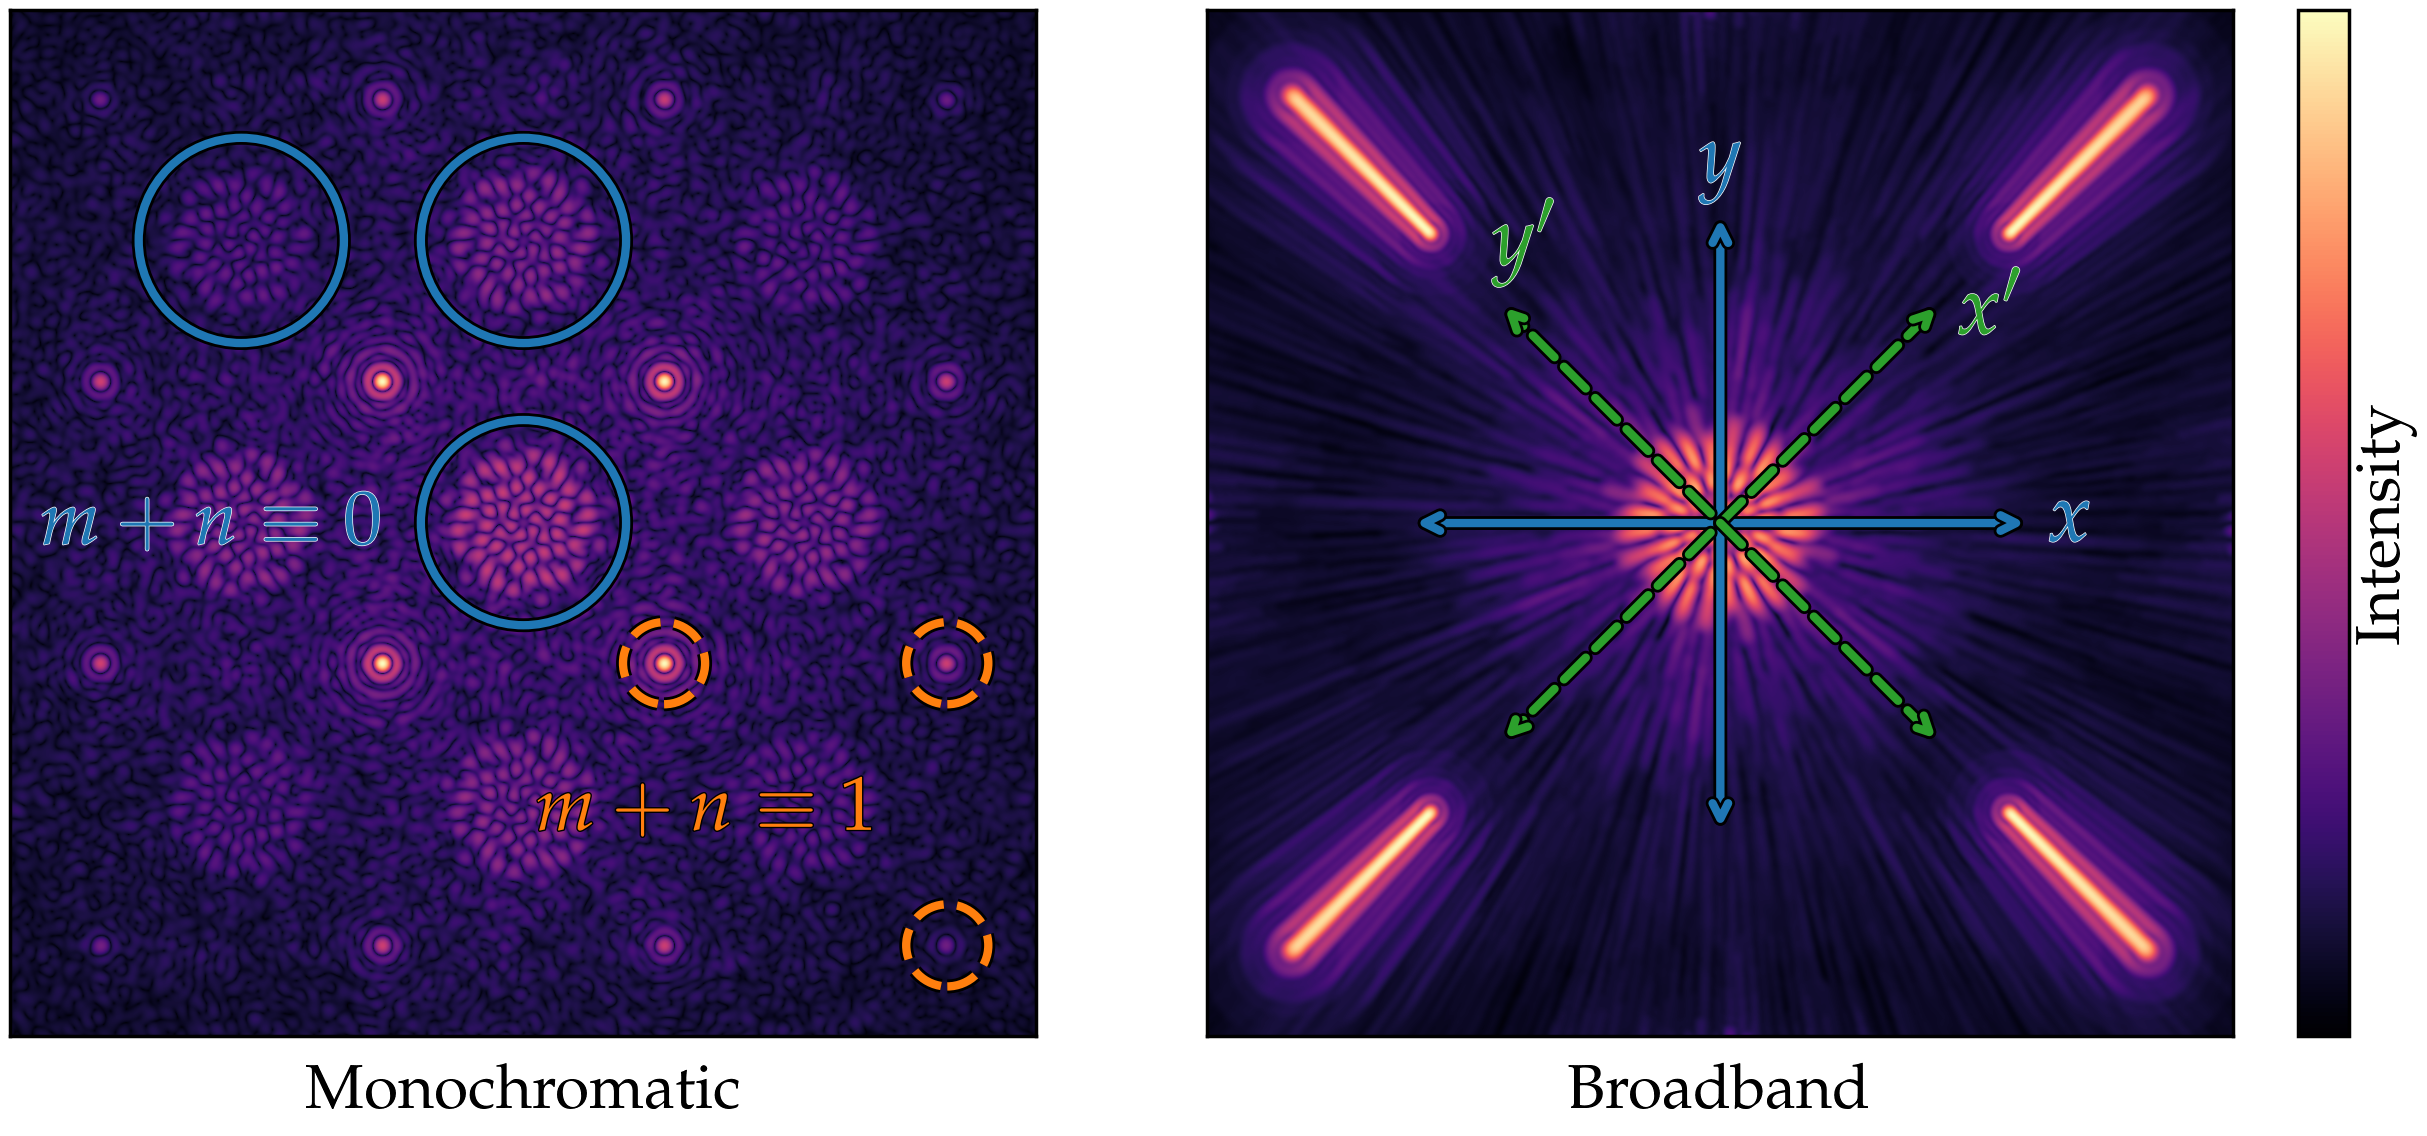

In [ ]:
# now for the actual plotting
# white path effects
path_effects_white = [pe.Stroke(linewidth=1, foreground='white'), pe.Normal()]
path_effects_white_big = [pe.Stroke(linewidth=10, foreground='white'), pe.Normal()]

fig = plt.figure(figsize=(27,12))
ax = fig.add_subplot(1,2,1)
im = ax.imshow(image**0.2, cmap='magma', origin='lower')
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_ticks([])
# cbar.set_label('Intensity')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Monochromatic', labelpad=20)

# choose center in pixel coords (x = column index, y = row index)
h, w = image.shape[:2]
x, y = w * 0.5, h * 0.5        # example coords (tweak as needed)
radius = min(h, w) * 0.1       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:blue', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big)
ax.add_patch(circ)

# add a label near the circle (data coords)
ax.text(x - 565, y-50, r'$m+n \equiv 0$',
        color='tab:blue', fontsize=55, ha='left', va='bottom',path_effects=path_effects_white),
        #bbox=dict(facecolor='white', alpha=1, pad=2))

# adding another circle
x, y = w * 0.5, h * 0.775        # example coords (tweak as needed)
radius = min(h, w) * 0.1       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:blue', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big)
ax.add_patch(circ)

# adding another circle
x, y = w * 0.225, h * 0.775        # example coords (tweak as needed)
radius = min(h, w) * 0.1       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:blue', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big)
ax.add_patch(circ)

# now we add the other orange circles

x, y = w * 0.637, h * 0.363        # example coords (tweak as needed)
radius = min(h, w) * 0.04       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:orange', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big, ls='--')
ax.add_patch(circ)

# add a label near the circle (data coords)
ax.text(x-150, y-220, r'$m+n \equiv 1$',
        color='tab:orange', fontsize=55, ha='left', va='bottom',path_effects=text_path_effects),
        #bbox=dict(facecolor='white', alpha=1, pad=2))

# orange circle
x, y = w * 0.913, h * 0.363        # example coords (tweak as needed)
radius = min(h, w) * 0.04       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:orange', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big, ls='--')
ax.add_patch(circ)

# another orange
x, y = w * 0.913, h * 0.088        # example coords (tweak as needed)
radius = min(h, w) * 0.04       # radius in pixels

circ = Circle((x, y), radius,
              edgecolor='tab:orange', facecolor='none', linewidth=6, alpha=1, path_effects = path_effects_big, ls='--')
ax.add_patch(circ)

# second axis
ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(image_poly**0.2, cmap='magma', origin='lower')
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.set_ticks([])
cbar2.set_label('Intensity')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel('Broadband', labelpad=20)

# adding arrows
# x axis
ax2.annotate(
    "",
    xy=(300, 600),               # tail
    xytext=(900, 600),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='tab:blue', path_effects=path_effects_big)
)

ax2.text(
    920, 600,
    r"$x$",
    va='center', ha='left',
    path_effects=path_effects_white, color='tab:blue', fontsize=60
)



# y axis
ax2.annotate(
    "",
    xy=(600, 300),               # tail
    xytext=(600, 900),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='tab:blue', path_effects=path_effects_big)
)

ax2.text(
    600, 950,
    r"$y$",
    va='center', ha='center',
    path_effects=path_effects_white, color='tab:blue', fontsize=60
)

# adding the new stuff (xprime and yprime)
ax2.annotate(
    "",
    xy=(388, 388),               # tail
    xytext=(812, 812),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='tab:green', path_effects=path_effects_big, ls='--')
)

ax2.text(
    862, 802,
    r"$x'$",
    va='center', ha='center',
    path_effects=path_effects_white, color='tab:green', fontsize=60
)

# adding the new stuff (xprime and yprime)
ax2.annotate(
    "",
    xy=(388, 812),               # tail
    xytext=(812, 388),           # head
    arrowprops=dict(arrowstyle='<->', linewidth=6, color='tab:green', path_effects=path_effects_big, ls='--')
)

ax2.text(
    408, 872,
    r"$y'$",
    va='center', ha='center',
    path_effects=path_effects_white, color='tab:green', fontsize=60
)


ax2.set_xlim([100,1100])
ax2.set_ylim([100,1100])

plt.tight_layout()

#plt.savefig('monobroadband.pdf',dpi=300,bbox_inches='tight')
plt.show()